In [33]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [35]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("(rows, columns))", z.shape)

(rows, columns)) (692500, 12)


In [36]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [37]:
z = z[['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'RENDIMIENTO_GLOBAL']]
z.head()

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Estrato 3,Si,medio-alto
1,Estrato 3,No,bajo
2,Estrato 3,Si,bajo
3,Estrato 4,Si,alto
4,Estrato 3,Si,medio-bajo


<Axes: xlabel='FAMI_TIENEINTERNET'>

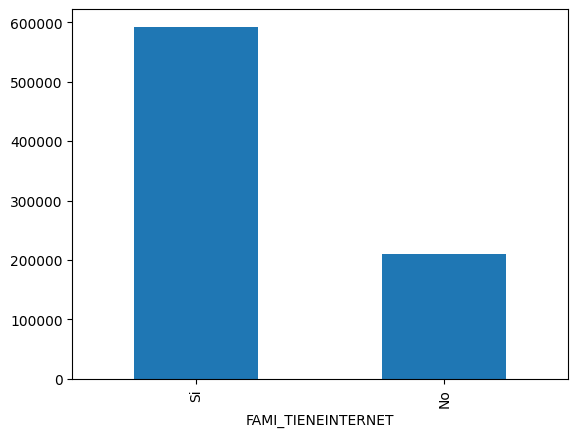

In [ ]:
z.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')
z.FAMI_TIENEINTERNET.value_counts().plot(kind='bar')

In [38]:
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.FAMI_TIENEINTERNET.isna())

(32137, 26629)

In [40]:
z.FAMI_ESTRATOVIVIENDA.values[z.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.FAMI_TIENEINTERNET.isna())
z.head()

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Estrato 3,Si,medio-alto
1,Estrato 3,No,bajo
2,Estrato 3,Si,bajo
3,Estrato 4,Si,alto
4,Estrato 3,Si,medio-bajo


In [43]:
z.FAMI_TIENEINTERNET.values[z.FAMI_TIENEINTERNET.isna()] = 'no info'
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.FAMI_TIENEINTERNET.isna())


(0, 0)

In [44]:
z.head()

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Estrato 3,Si,medio-alto
1,Estrato 3,No,bajo
2,Estrato 3,Si,bajo
3,Estrato 4,Si,alto
4,Estrato 3,Si,medio-bajo


In [46]:
internet_map={
    'no info': 0,
    'No': 0,
    'Si': 1
}
z.FAMI_TIENEINTERNET = np.r_[[internet_map[i] for i in z.FAMI_TIENEINTERNET]]
z.FAMI_TIENEINTERNET.value_counts()

,count
FAMI_TIENEINTERNET,
1,592514
0,99986
